In [1]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

read dataset

In [2]:
data = pd.read_csv("/content/SPAM text message 20170820 - Data.csv")

In [3]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [4]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 9s 129ms/step - loss: 0.2993 - acc: 0.9052 - val_loss: 0.1845 - val_acc: 0.9406
Epoch 2/10
60/60 [==============================] - 7s 124ms/step - loss: 0.1013 - acc: 0.9725 - val_loss: 0.0979 - val_acc: 0.9675
Epoch 3/10
60/60 [==============================] - 7s 124ms/step - loss: 0.4653 - acc: 0.7815 - val_loss: 0.1956 - val_acc: 0.9406
Epoch 4/10
60/60 [==============================] - 7s 125ms/step - loss: 0.1350 - acc: 0.9534 - val_loss: 0.1302 - val_acc: 0.9585
Epoch 5/10
60/60 [==============================] - 7s 125ms/step - loss: 0.0440 - acc: 0.9882 - val_loss: 0.1149 - val_acc: 0.9652
Epoch 6/10
60/60 [==============================] - 7s 125ms/step - loss: 0.0450 - acc: 0.9868 - val_loss: 0.0808 - val_acc: 0.9765
Epoch 7/10
60/60 [==============================] - 7s 125ms/step - loss: 0.0229 - acc: 0.9938 - val_loss: 0.0685 - val_acc: 0.9753
Epoch 8/10
60/60 [==============================] - 7s 124ms/step - loss: 0.

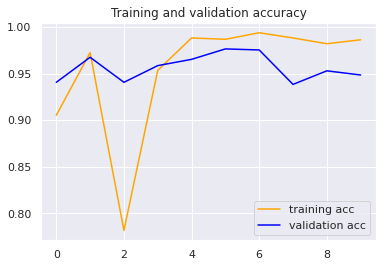

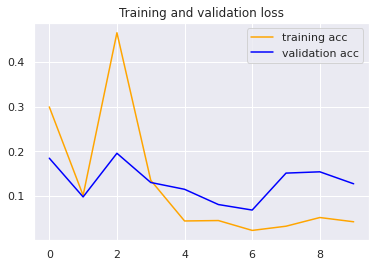

In [6]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

LSTM

In [9]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 18s 265ms/step - loss: 0.2707 - acc: 0.8951 - val_loss: 0.1270 - val_acc: 0.9753
Epoch 2/10
60/60 [==============================] - 15s 255ms/step - loss: 0.0927 - acc: 0.9812 - val_loss: 0.1218 - val_acc: 0.9765
Epoch 3/10
60/60 [==============================] - 15s 254ms/step - loss: 0.0483 - acc: 0.9891 - val_loss: 0.0634 - val_acc: 0.9787
Epoch 4/10
60/60 [==============================] - 15s 257ms/step - loss: 0.0293 - acc: 0.9930 - val_loss: 0.0483 - val_acc: 0.9798
Epoch 5/10
60/60 [==============================] - 15s 254ms/step - loss: 0.0203 - acc: 0.9950 - val_loss: 0.0458 - val_acc: 0.9865
Epoch 6/10
60/60 [==============================] - 15s 257ms/step - loss: 0.0152 - acc: 0.9966 - val_loss: 0.0443 - val_acc: 0.9843
Epoch 7/10
60/60 [==============================] - 16s 266ms/step - loss: 0.0384 - acc: 0.9871 - val_loss: 0.2369 - val_acc: 0.8946
Epoch 8/10
60/60 [==============================] - 15s 257ms/step - 

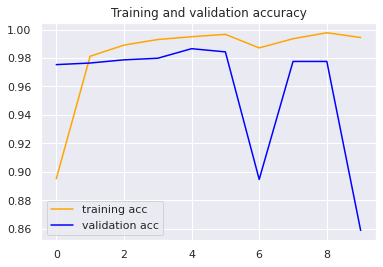

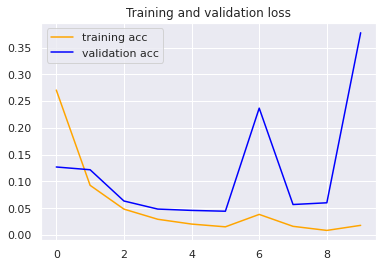

In [10]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()
